## Dent Detection
###  	차량 파손 검출

데이터셋 : 쏘카 파손 이미지 데이터셋    
사용 모델 : Yolov5-ultralytics  
학습 방법 : COCO Pre-trained 된 데이터를 fine-tuning  
손실 함수 : BCEWithLogitsLoss + loss for bounding box regression  
최적화 방법 : SGD  
스케쥴러 : OneCycleLR  

Label setting :  [class, center_x, center_y, width, height]  
    - class 제외 0~1값이 되도록 세팅
    
True Positive : 36개  
False Positive 17개  
True Negative : 51개  

result :
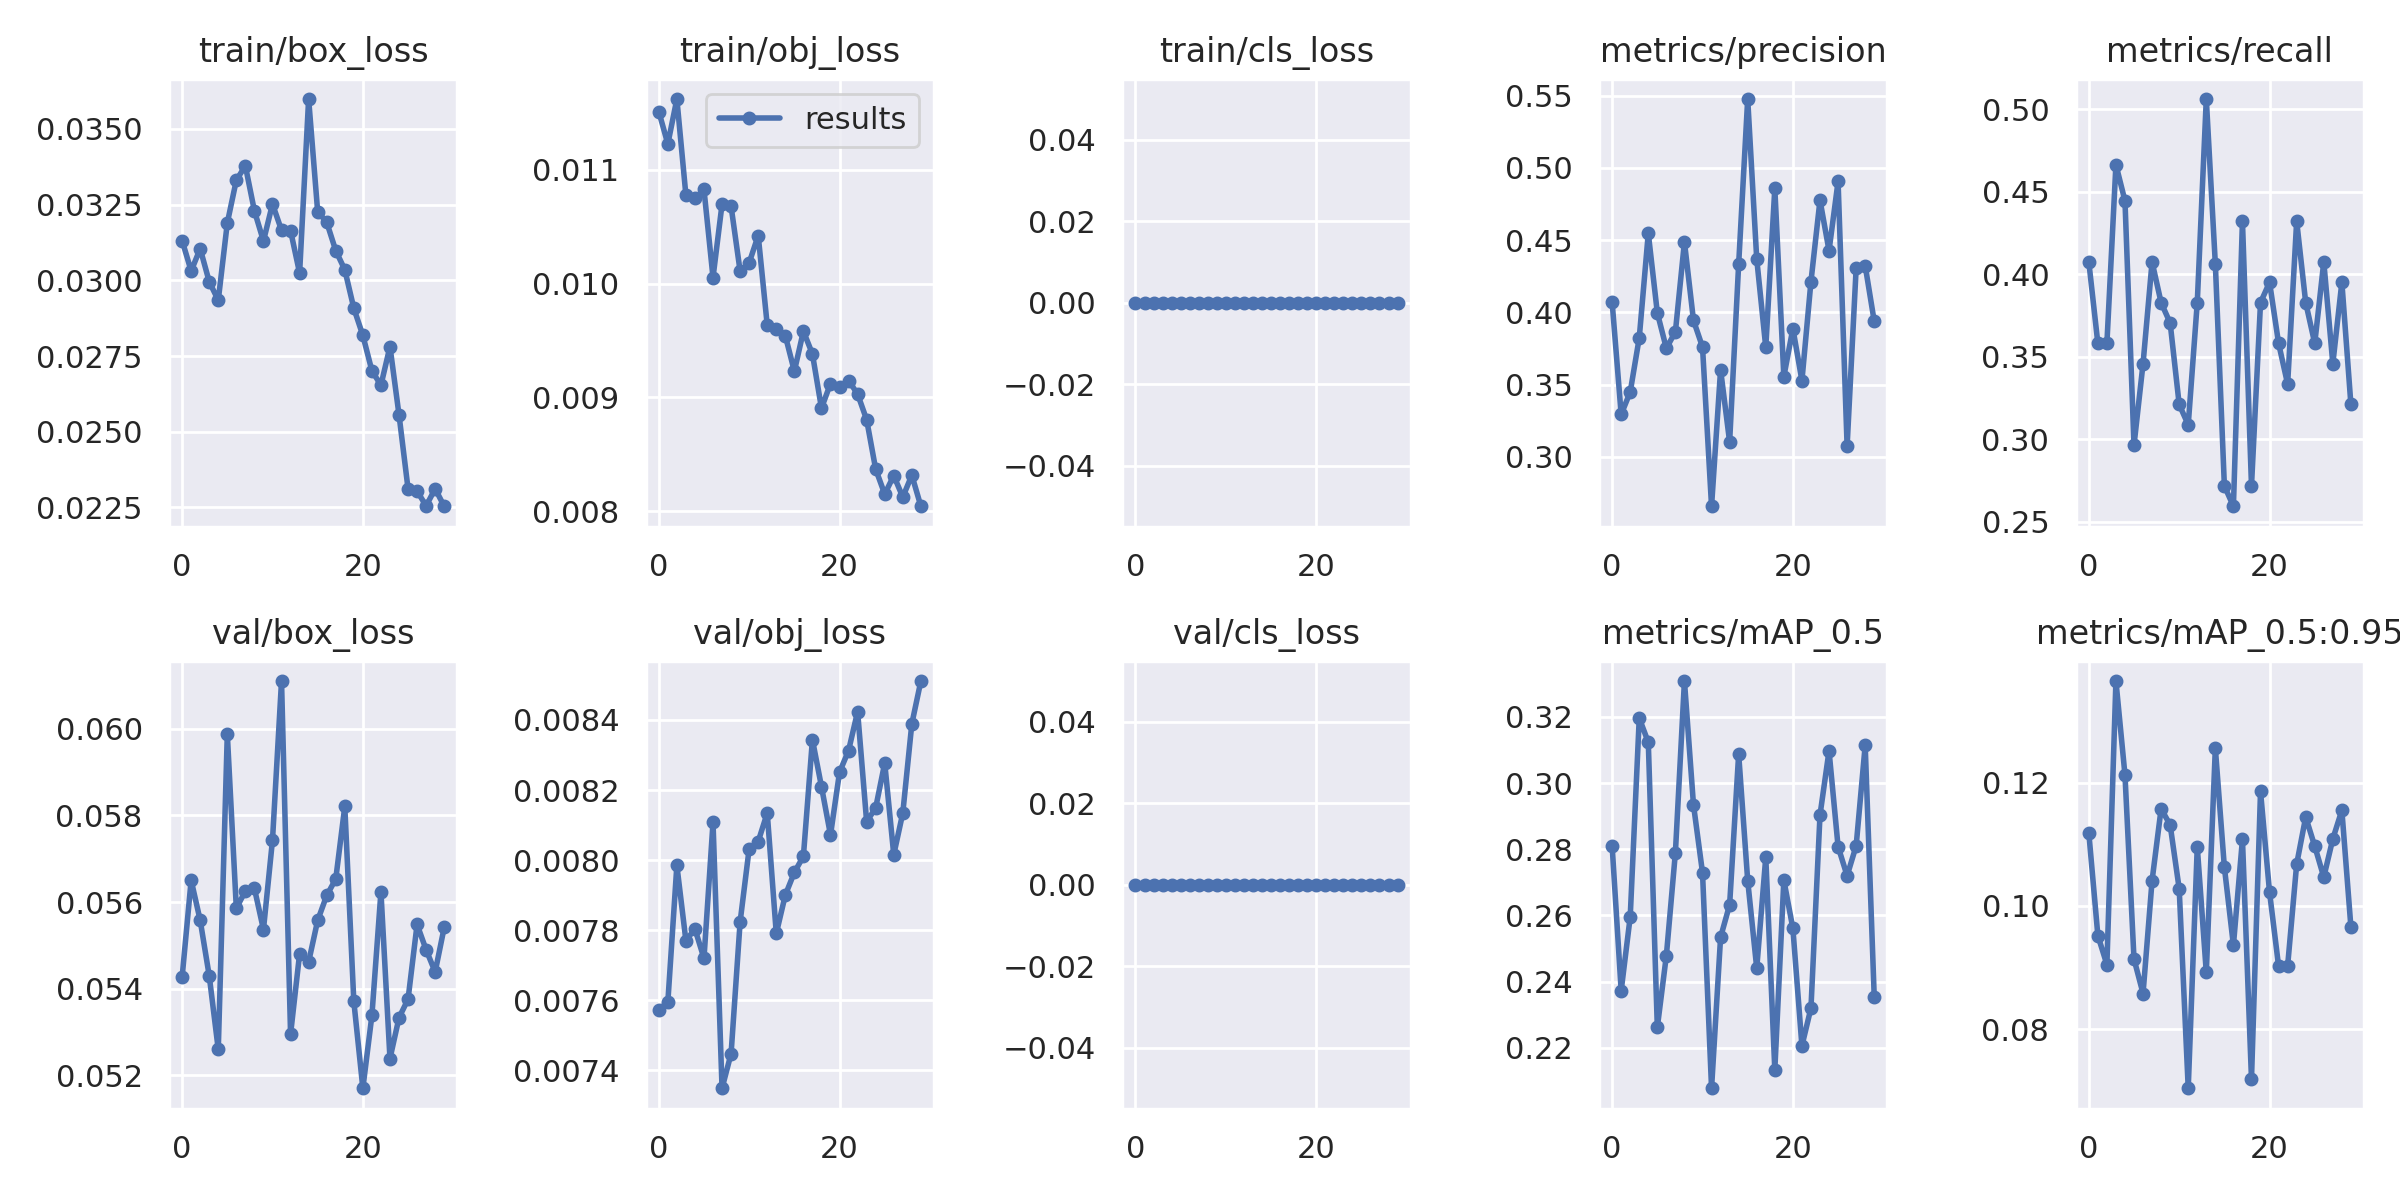



In [8]:
%matplotlib inline
import os
import cv2
import shutil
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
#PIL_image = Image.fromarray(np.uint8(numpy_image)).convert('RGB')


root = './dent'
type_dirs = os.listdir(root)
for type_dir in type_dirs:
    files = os.listdir(root+ '/'+ type_dir+'/masks')
    for file in tqdm(files):
        file_path = root+ '/'+ type_dir+'/masks/'+file
        image_file_path = root+ '/'+ type_dir+'/images/'+file
        src = cv2.imread(file_path,cv2.IMREAD_GRAYSCALE)
        #print(file_path)
        #print(src.shape)
        text_path = 'dent2'+ '/'+ type_dir+'/'+file[:-4]+'.txt'
        #print(text_path)
        width = src.shape[1]
        height = src.shape[0]
        _, src_bin = cv2.threshold(src,127, 255, cv2.THRESH_OTSU)
        cnt, labels, stats, centroids = cv2.connectedComponentsWithStats(src_bin)
        #with open("/home/mjs/test/TextFile.txt", "w") as file:
        if(cnt >1 ):
            copied = './dent2/'+type_dir+'/'+file
            #print(copied)
            shutil.copyfile(image_file_path, copied)
            with open(text_path, "w") as file:
                for i in range(1, cnt): 
                    (x, y, w, h, area) = stats[i]

                    img=cv2.imread(image_file_path)                    
                    cv2.rectangle(img, (x, y, w, h), (0, 0, 255))
                    PIL_image = Image.fromarray(img.astype('uint8'), 'RGB')
                    #plt.imshow(PIL_image)
                    #plt.show()
                    center_x = int(x + int(w/2)) /width
                    center_y = int(y + int(h/2)) /height

                    w = w / width
                    h = h / height
                    print(center_x,center_y,w,h)


                    stri = '0 '+str(center_x)+ ' ' +str(center_y)+ ' '+str(w)+ ' '+str(h)+'\n'
                    if area < 1000:
                        continue
                    file.writelines(stri)
                    
                    #cv2.imshow('img',img)
        #if(cnt >3):
            #print(text_path)

 17%|██████████████████████████████████████▉                                                                                                                                                                                           | 46/267 [00:00<00:00, 229.84it/s]

0.4166666666666667 0.8369140625 0.19791666666666666 0.244140625
0.8433333333333334 0.18375 0.31166666666666665 0.3425
0.5703125 0.7041015625 0.19140625 0.0908203125
0.3893229166666667 0.7421875 0.24088541666666666 0.1484375
0.11375 0.5116666666666667 0.06875 0.07166666666666667
0.32375 0.5583333333333333 0.03125 0.06166666666666667
0.2822265625 0.55859375 0.5625 0.3229166666666667
0.5703125 0.7734375 0.0751953125 0.05859375
0.576171875 0.8177083333333334 0.208984375 0.15625
0.4697265625 0.8958333333333334 0.0009765625 0.001736111111111111
0.32 0.46 0.15333333333333332 0.16375
0.42375 0.4666666666666667 0.7175 0.15166666666666667
0.677734375 0.5026041666666666 0.0654296875 0.06770833333333333
0.2425 0.7416666666666667 0.07375 0.04
0.28125 0.7616666666666667 0.00125 0.0016666666666666668
0.04875 0.23333333333333334 0.09875 0.25666666666666665
0.541015625 0.2716297786720322 0.201171875 0.22736418511066397
0.3723958333333333 0.552734375 0.10286458333333333 0.037109375
0.6425 0.62 0.1525 0.

 35%|███████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                  | 94/267 [00:00<00:00, 222.48it/s]

0.17708333333333334 0.3828125 0.0234375 0.037109375
0.56640625 0.6002604166666666 0.3349609375 0.18359375
0.47 0.55 0.08 0.05
0.8893229166666666 0.724609375 0.11197916666666667 0.1142578125
0.77 0.295 0.17333333333333334 0.20375
0.48 0.50375 0.37666666666666665 0.4625
0.6166666666666667 0.74 0.765 0.26125
0.7373046875 0.5331991951710262 0.208984375 0.26961770623742454
0.5244140625 0.8370221327967807 0.1328125 0.20321931589537223
0.3681640625 0.5716145833333334 0.17578125 0.05859375
0.6455078125 0.328125 0.4033203125 0.044270833333333336
0.4270833333333333 0.8232421875 0.09375 0.1083984375
0.6318359375 0.3854166666666667 0.12109375 0.2786458333333333
0.654296875 0.6419270833333334 0.326171875 0.3971354166666667
0.4462890625 0.6106770833333334 0.587890625 0.1328125
0.46125 0.6566666666666666 0.14875 0.15833333333333333
0.26375 0.765 0.13625 0.14166666666666666
0.3251953125 0.4921875 0.1572265625 0.16927083333333334


 46%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                          | 122/267 [00:00<00:00, 236.94it/s]

0.3325 0.3983333333333333 0.10125 0.11833333333333333
0.91875 0.7116666666666667 0.155 0.48333333333333334
0.6625 0.8033333333333333 0.07375 0.135
0.501953125 0.3880208333333333 0.779296875 0.7734375
0.2587890625 0.6861979166666666 0.1025390625 0.028645833333333332
0.685546875 0.3003472222222222 0.0576171875 0.043402777777777776
0.4140625 0.66015625 0.1728515625 0.26953125
0.033203125 0.7505030181086519 0.0673828125 0.08853118712273642
0.5325 0.5233333333333333 0.185 0.31166666666666665
0.81875 0.955 0.36125 0.09
0.685546875 0.5546875 0.6259765625 0.5364583333333334
0.40234375 0.447265625 0.0546875 0.02734375
0.5244140625 0.6770833333333334 0.189453125 0.052083333333333336
0.6201171875 0.703125 0.0009765625 0.0013020833333333333
0.4541015625 0.6720321931589537 0.1689453125 0.4949698189134809
0.4169921875 0.4140625 0.017578125 0.05859375
0.30078125 0.59375 0.6015625 0.28125
0.58984375 0.45703125 0.3450520833333333 0.27734375
0.30078125 0.529296875 0.13541666666666666 0.0615234375
0.3502

 64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                 | 171/267 [00:00<00:00, 220.36it/s]

0.16927083333333334 0.2783203125 0.3216145833333333 0.044921875
0.6653645833333334 0.4404296875 0.048177083333333336 0.0576171875
0.5221354166666666 0.5546875 0.08723958333333333 0.0322265625
0.4947916666666667 0.6123046875 0.12890625 0.046875
0.37166666666666665 0.55 0.3383333333333333 0.06625
0.575 0.465 0.5316666666666666 0.04625
0.4921875 0.8486328125 0.10286458333333333 0.048828125
0.4127604166666667 0.865234375 0.016927083333333332 0.0263671875
0.46875 0.5052083333333334 0.6552734375 0.14583333333333334
0.4892578125 0.6783854166666666 0.103515625 0.0390625
0.5615234375 0.75390625 0.1279296875 0.02734375
0.046875 0.3854166666666667 0.080078125 0.07421875
0.24 0.5575 0.06666666666666667 0.04
0.287109375 0.484375 0.400390625 0.2421875
0.5 0.63671875 1.0 0.14713541666666666
0.2966666666666667 0.60875 0.14166666666666666 0.1475
0.2666015625 0.28515625 0.0966796875 0.23828125
0.7525150905432596 0.3828125 0.1851106639839034 0.0498046875


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 221/267 [00:01<00:00, 213.71it/s]

0.3722334004024145 0.44921875 0.19919517102615694 0.06640625
0.11267605633802817 0.4482421875 0.2152917505030181 0.0546875
0.32193158953722334 0.5224609375 0.10663983903420524 0.1259765625
0.38375 0.46 0.43375 0.22333333333333333
0.52734375 0.796875 0.3896484375 0.078125
0.9049479166666666 0.4599609375 0.028645833333333332 0.015625
0.53 0.51875 0.26666666666666666 0.1775
0.5126953125 0.4739583333333333 0.0283203125 0.029947916666666668
0.802734375 0.4674479166666667 0.0126953125 0.020833333333333332
0.8095703125 0.5677083333333334 0.0693359375 0.04296875
0.7734375 0.58984375 0.0009765625 0.0013020833333333333
0.5986328125 0.6666666666666666 0.1708984375 0.08854166666666667
0.51171875 0.7109375 0.0009765625 0.0013020833333333333
0.9033203125 0.31640625 0.0791015625 0.12760416666666666
0.529296875 0.32421875 0.015625 0.0234375
0.201171875 0.65234375 0.283203125 0.12369791666666667
0.6888020833333334 0.6513671875 0.3411458333333333 0.1796875
0.555 0.495 0.09375 0.075
0.22265625 0.35742187

  0%|                                                                                                                                                                                                                                            | 0/267 [00:00<?, ?it/s]

0.0771484375 0.4661458333333333 0.1552734375 0.059895833333333336
0.555 0.5775 0.5866666666666667 0.19875
0.3919270833333333 0.4443359375 0.12109375 0.1416015625
0.3525390625 0.24479166666666666 0.1103515625 0.026041666666666668
0.13671875 0.4114583333333333 0.1171875 0.061197916666666664
0.3955078125 0.4296875 0.1513671875 0.03125
0.49609375 0.5455729166666666 0.0654296875 0.0546875
0.3971354166666667 0.66015625 0.6458333333333334 0.1591796875
0.07161458333333333 0.740234375 0.0013020833333333333 0.0009765625
0.3433333333333333 0.30375 0.23 0.06125
0.45 0.6266666666666667 0.1425 0.041666666666666664
0.5651041666666666 0.62890625 0.16796875 0.0537109375
0.453125 0.5364583333333334 0.078125 0.02734375
0.3037109375 0.5651041666666666 0.0361328125 0.040364583333333336
0.560546875 0.6145833333333334 0.16015625 0.11067708333333333
0.5013020833333334 0.61328125 0.06640625 0.201171875
0.447265625 0.8611111111111112 0.1015625 0.11805555555555555


 18%|█████████████████████████████████████████▍                                                                                                                                                                                        | 49/267 [00:00<00:00, 238.98it/s]

0.6435546875 0.427734375 0.109375 0.02734375
0.5869140625 0.44140625 0.0009765625 0.0009765625
0.6318359375 0.7529296875 0.2548828125 0.0673828125
0.6005859375 0.6861979166666666 0.7978515625 0.12109375
0.8564453125 0.4674479166666667 0.0732421875 0.0390625
0.6455078125 0.55859375 0.1376953125 0.06770833333333333
0.37890625 0.76171875 0.2978515625 0.2109375
0.3619791666666667 0.408203125 0.2630208333333333 0.14453125
0.3896484375 0.5412474849094567 0.2216796875 0.23138832997987926
0.326171875 0.6861167002012073 0.0703125 0.04024144869215292
0.5556640625 0.6119791666666666 0.064453125 0.055989583333333336
0.484375 0.6419270833333334 0.2578125 0.12109375
0.3525390625 0.703125 0.0009765625 0.0013020833333333333
0.0224609375 0.24479166666666666 0.0458984375 0.07421875
0.3090277777777778 0.71484375 0.3246527777777778 0.1513671875
0.435 0.35833333333333334 0.2475 0.17333333333333334


 39%|██████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                          | 103/267 [00:00<00:00, 246.67it/s]

0.50390625 0.419921875 0.5390625 0.0537109375
0.5333333333333333 0.48875 0.02666666666666667 0.055
0.2470703125 0.625 0.259765625 0.0763888888888889
0.5 0.41125 1.0 0.70625
0.34765625 0.82421875 0.6962890625 0.20572916666666666
0.12666666666666668 0.645 0.17333333333333334 0.18125
0.655 0.80375 0.69 0.15125
0.5068359375 0.7513020833333334 0.4052734375 0.07682291666666667
0.7646484375 0.15885416666666666 0.078125 0.08333333333333333
0.8251953125 0.14168377823408623 0.0361328125 0.10677618069815195
0.6650390625 0.30184804928131415 0.04296875 0.24229979466119098
0.578125 0.3141683778234086 0.0556640625 0.21149897330595482
0.3974609375 0.4271047227926078 0.1982421875 0.2053388090349076
0.486328125 0.6597222222222222 0.51171875 0.03298611111111111
0.7431640625 0.6770833333333334 0.0009765625 0.001736111111111111
0.439453125 0.7927565392354124 0.3056640625 0.06639839034205232
0.453125 0.4306640625 0.016927083333333332 0.025390625
0.375 0.4322916666666667 0.65234375 0.3984375
0.705078125 0.82

 57%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                | 153/267 [00:00<00:00, 237.62it/s]

0.2643229166666667 0.537109375 0.03515625 0.0380859375
0.53875 0.39666666666666667 0.44 0.27166666666666667
0.521484375 0.6498993963782697 0.240234375 0.06841046277665996
0.552734375 0.49295774647887325 0.1748046875 0.1710261569416499
0.513671875 0.7183098591549296 0.30859375 0.23340040241448692
0.5366666666666666 0.3975 0.7083333333333334 0.0425
0.404296875 0.4479166666666667 0.0732421875 0.09114583333333333
0.38375 0.7066666666666667 0.15625 0.12833333333333333
0.39 0.7716666666666666 0.00125 0.0016666666666666668
0.615234375 0.400390625 0.3359375 0.609375
0.8658854166666666 0.509765625 0.08984375 0.2548828125
0.6383333333333333 0.48125 0.5516666666666666 0.19375
0.33984375 0.34765625 0.4658203125 0.6927083333333334
0.8935546875 0.19270833333333334 0.2119140625 0.3098958333333333
0.8349609375 0.3854166666666667 0.1181640625 0.06944444444444445
0.7724609375 0.4201388888888889 0.0009765625 0.001736111111111111
0.18359375 0.7669270833333334 0.0986328125 0.046875
0.7734375 0.6728515625 0

 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                         | 199/267 [00:00<00:00, 212.76it/s]

0.5364583333333334 0.1826171875 0.040364583333333336 0.0078125
0.51 0.50875 0.36666666666666664 0.23375
0.453125 0.4127604166666667 0.9013671875 0.14713541666666666
0.46875 0.4814453125 0.3463541666666667 0.1103515625
0.8697916666666666 0.736328125 0.2604166666666667 0.1279296875
0.7197265625 0.68359375 0.1689453125 0.2526041666666667
0.234375 0.76953125 0.109375 0.08203125
0.548828125 0.5169270833333334 0.2421875 0.09505208333333333
0.5026041666666666 0.66796875 0.17708333333333334 0.076171875
0.295 0.46875 0.31166666666666665 0.0975
0.475 0.66625 0.05 0.03375
0.27 0.76625 0.16166666666666665 0.11125
0.609375 0.669921875 0.16666666666666666 0.2353515625
0.5175 0.5316666666666666 0.60375 0.17666666666666667
0.06076388888888889 0.923828125 0.09375 0.037109375
0.01171875 0.22916666666666666 0.0224609375 0.02734375
0.0478515625 0.3658854166666667 0.095703125 0.10546875
0.3857421875 0.5559895833333334 0.3193359375 0.25390625
0.314453125 0.5872395833333334 0.068359375 0.061197916666666664
0

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 256/267 [00:01<00:00, 238.83it/s]

0.5380859375 0.634765625 0.072265625 0.06640625
0.49609375 0.621903520208605 0.1328125 0.05736636245110821
0.185546875 0.6979166666666666 0.1025390625 0.03515625
0.16166666666666665 0.42125 0.09833333333333333 0.08375
0.53375 0.63 0.0525 0.075
0.3388671875 0.4401041666666667 0.6201171875 0.12890625
0.8017578125 0.5442708333333334 0.0439453125 0.041666666666666664
0.4765625 0.55078125 0.19791666666666666 0.078125
0.7135416666666666 0.5927734375 0.10286458333333333 0.013671875
0.25875 0.195 0.485 0.365
0.66375 0.43666666666666665 0.32 0.30833333333333335
0.4525 0.46 0.10625 0.21666666666666667
0.197265625 0.59765625 0.1455078125 0.022135416666666668
0.275390625 0.6028645833333334 0.0009765625 0.0013020833333333333
0.119140625 0.609375 0.0009765625 0.0013020833333333333
0.5419921875 0.7048611111111112 0.259765625 0.10069444444444445
0.60546875 0.296875 0.158203125 0.1875


  1%|██▉                                                                                                                                                                                                                              | 28/2132 [00:00<00:07, 274.56it/s]

0.44921875 0.251953125 0.16666666666666666 0.10546875
0.6705729166666666 0.548828125 0.11588541666666667 0.1171875
0.5009765625 0.578125 0.396484375 0.2222222222222222
0.4560546875 0.5247395833333334 0.1884765625 0.059895833333333336
0.3603515625 0.5546875 0.0009765625 0.0013020833333333333
0.38333333333333336 0.32875 0.19666666666666666 0.12625
0.5029296875 0.7326388888888888 0.04296875 0.017361111111111112
0.0888671875 0.2747395833333333 0.0546875 0.06380208333333333
0.37 0.67875 0.7366666666666667 0.6425
0.33125 0.3883333333333333 0.095 0.13166666666666665
0.748046875 0.3658854166666667 0.0830078125 0.2877604166666667
0.4275 0.4266666666666667 0.12625 0.365
0.5302734375 0.80078125 0.52734375 0.140625
0.794921875 0.87109375 0.0009765625 0.0013020833333333333
0.779296875 0.4427083333333333 0.306640625 0.3359375
0.388671875 0.4635416666666667 0.267578125 0.24869791666666666
0.1103515625 0.6119791666666666 0.1943359375 0.28125
0.275 0.6116666666666667 0.225 0.19166666666666668
0.1875 0.

  4%|█████████▋                                                                                                                                                                                                                       | 92/2132 [00:00<00:06, 308.63it/s]

0.45 0.55375 0.5866666666666667 0.1825
0.44140625 0.4931640625 0.17838541666666666 0.2236328125
0.51171875 0.60546875 0.0013020833333333333 0.0009765625
0.6484375 0.3854166666666667 0.048828125 0.0546875
0.4921875 0.4970703125 0.390625 0.1943359375
0.541015625 0.6640625 0.2353515625 0.078125
0.5888671875 0.5989583333333334 0.822265625 0.2734375
0.826171875 0.62109375 0.064453125 0.016927083333333332
0.7275390625 0.6458333333333334 0.1298828125 0.036458333333333336
0.44921875 0.703125 0.294921875 0.12239583333333333
0.65625 0.6653645833333334 0.0009765625 0.0013020833333333333
0.66015625 0.6640625 0.0009765625 0.0013020833333333333
0.578125 0.6865234375 0.20963541666666666 0.0302734375
0.6848958333333334 0.701171875 0.0013020833333333333 0.0009765625
0.421875 0.4309895833333333 0.087890625 0.045572916666666664
0.7080078125 0.6184895833333334 0.0908203125 0.057291666666666664
0.47333333333333333 0.54875 0.12166666666666667 0.0725


  6%|████████████▉                                                                                                                                                                                                                   | 123/2132 [00:00<00:07, 253.17it/s]

0.490234375 0.6493055555555556 0.4658203125 0.11631944444444445
0.4404296875 0.6276041666666666 0.2158203125 0.4140625
0.154296875 0.5833333333333334 0.11328125 0.09375
0.5205078125 0.67578125 0.7041015625 0.16276041666666666
0.62890625 0.5243055555555556 0.0537109375 0.1232638888888889
0.3671875 0.5416666666666666 0.0625 0.11458333333333333
0.4049479166666667 0.5546875 0.5481770833333334 0.2255859375
0.37109375 0.1181640625 0.09505208333333333 0.0478515625
0.20572916666666666 0.37890625 0.1328125 0.3173828125
0.2721354166666667 0.5390625 0.0013020833333333333 0.0009765625
0.5247395833333334 0.7890625 0.21614583333333334 0.2568359375
0.3466796875 0.47484909456740443 0.0390625 0.056338028169014086
0.8541666666666666 0.041015625 0.06380208333333333 0.0810546875
0.8815104166666666 0.2685546875 0.17317708333333334 0.171875
0.32421875 0.646484375 0.28125 0.3369140625
0.4853515625 0.6365503080082136 0.232421875 0.5605749486652978
0.5712890625 0.58984375 0.173828125 0.08984375
0.4814453125 0.

  8%|██████████████████▎                                                                                                                                                                                                             | 174/2132 [00:00<00:09, 214.39it/s]

0.3046875 0.6201171875 0.21875 0.12890625
0.2 0.3516666666666667 0.19125 0.12666666666666668
0.0263671875 0.4205729166666667 0.01953125 0.02734375
0.7626953125 0.4895833333333333 0.07421875 0.01953125
0.666015625 0.3059895833333333 0.0625 0.16927083333333334
0.8115234375 0.40234375 0.0693359375 0.07421875
0.49609375 0.5924479166666666 0.2822265625 0.18880208333333334
0.1435546875 0.8111979166666666 0.2880859375 0.3763020833333333
0.775 0.7983333333333333 0.105 0.055
0.72 0.8266666666666667 0.00125 0.0016666666666666668
0.150390625 0.5572916666666666 0.103515625 0.16319444444444445
0.4296875 0.6145833333333334 0.1611328125 0.06510416666666667
0.5712890625 0.3893229166666667 0.361328125 0.12890625
0.8359375 0.396484375 0.028645833333333332 0.099609375
0.6366666666666667 0.86 0.185 0.13875
0.43833333333333335 0.915 0.045 0.02125
0.3383333333333333 0.97125 0.24 0.05625
0.37625 0.7483333333333333 0.3075 0.02666666666666667
0.3325 0.23666666666666666 0.4225 0.12833333333333333
0.51171875 0.4

 11%|████████████████████████▌                                                                                                                                                                                                       | 234/2132 [00:00<00:07, 248.07it/s]

0.65234375 0.166015625 0.6822916666666666 0.3095703125
0.3893229166666667 0.740234375 0.375 0.0703125
0.4856770833333333 0.8212890625 0.06640625 0.02734375
0.5244140625 0.5052083333333334 0.2119140625 0.3107638888888889
0.6822916666666666 0.6376953125 0.3893229166666667 0.2060546875
0.5677083333333334 0.705078125 0.3059895833333333 0.0625
0.6630859375 0.6848958333333334 0.0283203125 0.055989583333333336
0.4674479166666667 0.3203125 0.5065104166666666 0.1474609375
0.50390625 0.5690104166666666 0.3115234375 0.5091145833333334
0.6513671875 0.4049479166666667 0.0791015625 0.078125
0.435 0.55125 0.5866666666666667 0.44875
0.5065104166666666 0.248046875 0.15755208333333334 0.2841796875
0.66796875 0.666015625 0.28125 0.302734375


 13%|█████████████████████████████▉                                                                                                                                                                                                  | 285/2132 [00:01<00:07, 234.50it/s]

0.8059895833333334 0.818359375 0.0013020833333333333 0.0009765625
0.5283203125 0.6076388888888888 0.2021484375 0.06597222222222222
0.42578125 0.640625 0.0009765625 0.001736111111111111
0.466796875 0.4140625 0.203125 0.09505208333333333
0.8857421875 0.5833333333333334 0.0263671875 0.022135416666666668
0.21875 0.6263020833333334 0.1298828125 0.029947916666666668
0.1513671875 0.6419270833333334 0.00390625 0.0013020833333333333
0.14453125 0.6432291666666666 0.0009765625 0.0013020833333333333
0.3779296875 0.75 0.3408203125 0.1875
0.21375 0.2633333333333333 0.12 0.5233333333333333
0.5275 0.6616666666666666 0.30625 0.16166666666666665
0.716796875 0.66796875 0.125 0.12369791666666667
0.541015625 0.6731770833333334 0.125 0.04296875
0.6064453125 0.6731770833333334 0.0009765625 0.0013020833333333333
0.2625 0.49333333333333335 0.14 0.08333333333333333
0.85625 0.6366666666666667 0.135 0.1
0.52875 0.4483333333333333 0.66 0.21166666666666667
0.37625 0.6116666666666667 0.165 0.22666666666666666
0.5449

 16%|███████████████████████████████████▍                                                                                                                                                                                            | 337/2132 [00:01<00:07, 228.14it/s]

0.482421875 0.8628472222222222 0.0869140625 0.026041666666666668
0.56640625 0.8628472222222222 0.0546875 0.015625
0.605 0.825 0.08125 0.065
0.545 0.905 0.075 0.035
0.4683333333333333 0.44 0.27 0.135
0.3333333333333333 0.5275 0.021666666666666667 0.02125
0.8984375 0.4661458333333333 0.203125 0.19401041666666666
0.654296875 0.5169270833333334 0.134765625 0.15885416666666666
0.4296875 0.140625 0.0859375 0.10069444444444445
0.4541015625 0.16927083333333334 0.029296875 0.02734375
0.5302734375 0.265625 0.0419921875 0.029947916666666668
0.7001953125 0.4270833333333333 0.041015625 0.036458333333333336
0.45 0.62 0.5475 0.39
0.7060546875 0.4635416666666667 0.0595703125 0.040364583333333336
0.3037109375 0.5768229166666666 0.1337890625 0.13411458333333334
0.4296875 0.5833333333333334 0.1572265625 0.10677083333333333
0.4794921875 0.6783854166666666 0.25390625 0.09114583333333333
0.6767578125 0.6888020833333334 0.1162109375 0.037760416666666664
0.4345703125 0.7682291666666666 0.0693359375 0.01953125

 17%|█████████████████████████████████████▉                                                                                                                                                                                          | 361/2132 [00:01<00:08, 199.76it/s]

0.654296875 0.32421875 0.0009765625 0.0009765625
0.5078125 0.6015625 0.2526041666666667 0.0546875
0.3763020833333333 0.6298828125 0.0078125 0.001953125
0.3645833333333333 0.6318359375 0.0026041666666666665 0.0009765625
0.3697916666666667 0.630859375 0.0026041666666666665 0.0009765625
0.35546875 0.6337890625 0.0026041666666666665 0.0009765625
0.3606770833333333 0.6328125 0.0026041666666666665 0.0009765625
0.3515625 0.634765625 0.0013020833333333333 0.0009765625
0.349609375 0.546875 0.3125 0.06901041666666667
0.7373046875 0.5833333333333334 0.103515625 0.06510416666666667
0.73125 0.29333333333333333 0.17375 0.155
0.40166666666666667 0.5125 0.058333333333333334 0.035
0.4755859375 0.4283854166666667 0.111328125 0.3151041666666667
0.6318359375 0.5225694444444444 0.0380859375 0.05555555555555555
0.4365234375 0.6041666666666666 0.1328125 0.059027777777777776
0.1513671875 0.6371527777777778 0.0517578125 0.07291666666666667
0.49609375 0.5703125 0.3619791666666667 0.263671875
0.4990234375 0.3359

 19%|███████████████████████████████████████████▍                                                                                                                                                                                    | 414/2132 [00:01<00:07, 215.63it/s]

0.546875 0.4658203125 0.0390625 0.0234375
0.3463541666666667 0.474609375 0.022135416666666668 0.0126953125
0.4466145833333333 0.6806640625 0.018229166666666668 0.02734375
0.283203125 0.5503472222222222 0.1552734375 0.2378472222222222
0.3017578125 0.8072916666666666 0.095703125 0.046875
0.10677083333333333 0.2060546875 0.21484375 0.1044921875
0.725 0.33875 0.15333333333333332 0.22875
0.6943359375 0.5559895833333334 0.037109375 0.028645833333333332
0.412109375 0.5638020833333334 0.0361328125 0.013020833333333334
0.712890625 0.6559356136820925 0.1064453125 0.0482897384305835
0.6 0.49625 0.21333333333333335 0.1275
0.5693359375 0.5520833333333334 0.2158203125 0.11979166666666667
0.7724609375 0.22535211267605634 0.13671875 0.18108651911468812
0.171875 0.59375 0.0732421875 0.049479166666666664
0.7099609375 0.6653645833333334 0.0166015625 0.009114583333333334
0.6689453125 0.67578125 0.015625 0.009114583333333334


 22%|████████████████████████████████████████████████▎                                                                                                                                                                               | 460/2132 [00:02<00:08, 206.22it/s]

0.48828125 0.4775390625 0.022135416666666668 0.0419921875
0.36328125 0.43359375 0.546875 0.0556640625
0.0859375 0.4619140625 0.0013020833333333333 0.0009765625
0.4619140625 0.5935613682092555 0.7880859375 0.11468812877263582
0.50390625 0.5244140625 0.19791666666666666 0.095703125
0.6611328125 0.62109375 0.185546875 0.028645833333333332
0.2041015625 0.6744791666666666 0.046875 0.014322916666666666
0.5216666666666666 0.435 0.17166666666666666 0.12125
0.3333333333333333 0.57 0.135 0.18
0.40166666666666667 0.66125 0.0016666666666666668 0.00125
0.4033333333333333 0.665 0.0016666666666666668 0.00125
0.34765625 0.5338541666666666 0.056640625 0.052083333333333336
0.541015625 0.6432291666666666 0.2958984375 0.09114583333333333
0.5338541666666666 0.54296875 0.10416666666666667 0.0205078125
0.51953125 0.578125 0.14583333333333334 0.0302734375
0.4427083333333333 0.59375 0.0013020833333333333 0.0009765625
0.892578125 0.5442708333333334 0.0126953125 0.018229166666666668
0.65625 0.5989583333333334 0.

 24%|█████████████████████████████████████████████████████▉                                                                                                                                                                          | 513/2132 [00:02<00:07, 226.51it/s]

0.4869791666666667 0.390625 0.09895833333333333 0.177734375
0.330078125 0.3815104166666667 0.265625 0.11979166666666667
0.34765625 0.6966145833333334 0.193359375 0.11588541666666667
0.3919270833333333 0.17578125 0.18489583333333334 0.1728515625
0.7626953125 0.8229166666666666 0.126953125 0.06901041666666667
0.525390625 0.4791666666666667 0.9482421875 0.2326388888888889
0.3681640625 0.4934895833333333 0.02734375 0.037760416666666664
0.509765625 0.6744791666666666 0.22265625 0.109375
0.6220703125 0.7291666666666666 0.0009765625 0.0013020833333333333
0.4525 0.5533333333333333 0.73375 0.20166666666666666
0.451171875 0.5399305555555556 0.359375 0.21354166666666666
0.5654296875 0.5546875 0.609375 0.09635416666666667
0.5885416666666666 0.3798828125 0.3098958333333333 0.376953125
0.1943359375 0.48828125 0.033203125 0.048177083333333336
0.3310546875 0.5442708333333334 0.123046875 0.15625
0.4404296875 0.5924479166666666 0.080078125 0.23567708333333334
0.96484375 0.5677083333333334 0.0703125 0.16

 26%|██████████████████████████████████████████████████████████▊                                                                                                                                                                     | 560/2132 [00:02<00:06, 225.64it/s]

0.5009765625 0.7673611111111112 0.0478515625 0.017361111111111112
0.5033333333333333 0.44 0.12833333333333333 0.1525
0.7716666666666666 0.7225 0.31 0.1975
0.66 0.71 0.13 0.07
0.5916666666666667 0.745 0.0016666666666666668 0.00125
0.7330729166666666 0.2646484375 0.07421875 0.0703125
0.6953125 0.30078125 0.0013020833333333333 0.0009765625
0.6982421875 0.6197916666666666 0.044921875 0.019097222222222224
0.5333333333333333 0.575 0.55 0.31625
0.5986328125 0.3971354166666667 0.1962890625 0.09505208333333333
0.025390625 0.7005208333333334 0.0517578125 0.049479166666666664
0.5205078125 0.869140625 0.283203125 0.177734375
0.642578125 0.8291015625 0.0009765625 0.0009765625
0.640625 0.830078125 0.0009765625 0.0009765625
0.353515625 0.91015625 0.0498046875 0.083984375
0.4825 0.5216666666666666 0.53625 0.5816666666666667
0.8 0.2683333333333333 0.17125 0.1
0.5533333333333333 0.5925 0.38666666666666666 0.07375
0.6166666666666667 0.36625 0.28833333333333333 0.295
0.7616666666666667 0.515 0.00166666666

 29%|████████████████████████████████████████████████████████████████▏                                                                                                                                                               | 611/2132 [00:02<00:06, 223.40it/s]

0.6943359375 0.5807291666666666 0.611328125 0.4765625
0.19921875 0.6315104166666666 0.3115234375 0.22526041666666666
0.41625 0.6233333333333333 0.2475 0.11
0.01125 0.365 0.02375 0.05
0.4638671875 0.5481770833333334 0.693359375 0.26171875
0.695 0.45166666666666666 0.0825 0.11333333333333333
0.3625 0.475 0.2325 0.06166666666666667
0.6015625 0.4989733059548255 0.26953125 0.2402464065708419
0.7294921875 0.5441478439425051 0.01953125 0.026694045174537988
0.529296875 0.4236111111111111 0.91015625 0.2482638888888889
0.7116666666666667 0.53 0.18333333333333332 0.14
0.4296875 0.3271484375 0.1796875 0.060546875
0.4309895833333333 0.4931640625 0.2421875 0.1123046875
0.3697916666666667 0.6435546875 0.13151041666666666 0.0771484375
0.64453125 0.400390625 0.3515625 0.3486328125
0.4205729166666667 0.162109375 0.0390625 0.044921875
0.376953125 0.5920138888888888 0.255859375 0.1423611111111111
0.6383333333333333 0.4975 0.43833333333333335 0.2625
0.5625 0.5130208333333334 0.1298828125 0.05078125
0.42480

 30%|███████████████████████████████████████████████████████████████████▊                                                                                                                                                            | 645/2132 [00:02<00:06, 241.83it/s]

0.5712890625 0.43359375 0.7236328125 0.11458333333333333
0.4189453125 0.5638020833333334 0.201171875 0.20052083333333334
0.5733333333333334 0.41375 0.5283333333333333 0.2025
0.4674479166666667 0.5576171875 0.68359375 0.25
0.142578125 0.3802083333333333 0.0166015625 0.02734375
0.2744140625 0.37890625 0.060546875 0.020833333333333332
0.306640625 0.3893229166666667 0.0009765625 0.0013020833333333333
0.5763888888888888 0.4501953125 0.027777777777777776 0.0556640625
0.5746527777777778 0.4794921875 0.001736111111111111 0.0009765625
0.6041666666666666 0.5166015625 0.036458333333333336 0.03515625
0.35546875 0.2951388888888889 0.150390625 0.3368055555555556
0.4475 0.7233333333333334 0.17 0.05333333333333334
0.62 0.33166666666666667 0.14875 0.48333333333333334
0.50375 0.9383333333333334 0.04125 0.11333333333333333
0.405 0.67 0.2966666666666667 0.10625
0.7866666666666666 0.74125 0.4266666666666667 0.21875
0.365 0.57875 0.365 0.14875
0.4752604166666667 0.55078125 0.18619791666666666 0.076171875
0.

 33%|█████████████████████████████████████████████████████████████████████████                                                                                                                                                       | 695/2132 [00:03<00:06, 234.66it/s]

0.3740234375 0.5221354166666666 0.4228515625 0.15755208333333334
0.1943359375 0.6015625 0.0009765625 0.0013020833333333333
0.575 0.5025 0.5016666666666667 0.25875
0.3628472222222222 0.1005859375 0.24479166666666666 0.0751953125
0.4427083333333333 0.138671875 0.001736111111111111 0.0009765625
0.5083333333333333 0.4875 0.17833333333333334 0.0725
0.6075 0.37333333333333335 0.1375 0.19833333333333333
0.4921875 0.5986328125 0.16276041666666666 0.337890625
0.3033854166666667 0.5888671875 0.0013020833333333333 0.0009765625
0.3072916666666667 0.58984375 0.0026041666666666665 0.0009765625
0.5104166666666666 0.66796875 0.4010416666666667 0.154296875
0.485 0.43666666666666665 0.3975 0.43666666666666665
0.53125 0.52 0.32625 0.15666666666666668
0.830078125 0.48828125 0.0966796875 0.11588541666666667
0.1552734375 0.4388020833333333 0.146484375 0.033854166666666664
0.4775390625 0.4765625 0.4111328125 0.06901041666666667
0.3346354166666667 0.2236328125 0.06640625 0.1650390625
0.52734375 0.358072916666

 35%|██████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                 | 747/2132 [00:03<00:06, 224.87it/s]

0.5859375 0.4231770833333333 0.3173828125 0.12760416666666666
0.10625 0.955 0.14625 0.09
0.2626953125 0.7395833333333334 0.29296875 0.05859375
0.11328125 0.76953125 0.0009765625 0.0013020833333333333
0.7434895833333334 0.7744140625 0.51171875 0.2646484375
0.8837890625 0.3880208333333333 0.1484375 0.359375
0.6728515625 0.6432291666666666 0.134765625 0.17057291666666666
0.80859375 0.5690104166666666 0.0009765625 0.0013020833333333333
0.3671875 0.4153645833333333 0.189453125 0.10677083333333333
0.5390625 0.4895833333333333 0.115234375 0.07291666666666667
0.59765625 0.5260416666666666 0.0009765625 0.001736111111111111
0.28833333333333333 0.405 0.12 0.1125
0.55078125 0.5643939393939394 0.2373046875 0.14962121212121213
0.400390625 0.69921875 0.4931640625 0.06380208333333333
0.900390625 0.4231770833333333 0.0380859375 0.057291666666666664
0.6416015625 0.4869791666666667 0.1923828125 0.08072916666666667
0.89453125 0.44921875 0.16015625 0.061197916666666664
0.6796875 0.48828125 0.0849609375 0.0

 37%|███████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                            | 798/2132 [00:03<00:05, 233.01it/s]

0.63671875 0.1455078125 0.4010416666666667 0.287109375
0.2747395833333333 0.611328125 0.17447916666666666 0.060546875
0.3841145833333333 0.6884765625 0.17578125 0.0859375
0.58875 0.56 0.7225 0.225
0.3193359375 0.4986979166666667 0.263671875 0.24739583333333334
0.595 0.20875 0.056666666666666664 0.02625
0.42125 0.6066666666666667 0.03875 0.07166666666666667
0.498046875 0.4700520833333333 0.1904296875 0.3033854166666667
0.388671875 0.6128472222222222 0.4375 0.17708333333333334
0.5380859375 0.765625 0.5830078125 0.11458333333333333
0.189453125 0.74609375 0.3798828125 0.5068359375
0.4873046875 0.5419921875 0.0537109375 0.0439453125
0.5908203125 0.5078125 0.1953125 0.09114583333333333
0.5419921875 0.734375 0.1474609375 0.20442708333333334
0.244140625 0.7096354166666666 0.30078125 0.14973958333333334
0.189453125 0.7291666666666666 0.2353515625 0.16796875
0.537109375 0.8424479166666666 0.0361328125 0.032552083333333336
0.195 0.5025 0.07833333333333334 0.06375
0.6575520833333334 0.5205078125 0

 40%|████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                       | 846/2132 [00:03<00:06, 214.10it/s]

0.4583333333333333 0.6240234375 0.16015625 0.18359375
0.49609375 0.716796875 0.0013020833333333333 0.0009765625
0.298828125 0.4791666666666667 0.0556640625 0.05555555555555555
0.59765625 0.609375 0.0791015625 0.057291666666666664
0.662109375 0.6753472222222222 0.0830078125 0.0763888888888889
0.6217303822937625 0.583984375 0.15090543259557343 0.1298828125
0.73625 0.3983333333333333 0.17375 0.21
0.58125 0.5366666666666666 0.10375 0.18666666666666668
0.7734375 0.556640625 0.4401041666666667 0.123046875
0.40875 0.445 0.3525 0.26666666666666666
0.5182291666666666 0.7373046875 0.22265625 0.3251953125
0.52734375 0.7597535934291582 0.3349609375 0.057494866529774126
0.16796875 0.4192708333333333 0.025390625 0.016927083333333332
0.4973958333333333 0.328125 0.7473958333333334 0.1513671875
0.5872395833333334 0.638671875 0.6276041666666666 0.1318359375
0.2763671875 0.5325520833333334 0.0546875 0.08984375
0.035 0.515 0.06625 0.07666666666666666
0.25375 0.7283333333333334 0.1625 0.13333333333333333
0

 41%|███████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                    | 872/2132 [00:03<00:05, 225.90it/s]

0.51625 0.5266666666666666 0.0775 0.051666666666666666
0.245 0.5566666666666666 0.09125 0.1
0.39625 0.6916666666666667 0.30375 0.16833333333333333
0.837890625 0.6354166666666666 0.044921875 0.026041666666666668
0.5243055555555556 0.640625 0.4809027777777778 0.1005859375
0.8940972222222222 0.66796875 0.203125 0.064453125
0.7743055555555556 0.875 0.08333333333333333 0.02734375
0.5205078125 0.5026041666666666 0.2802734375 0.3333333333333333
0.7255859375 0.5182291666666666 0.0263671875 0.020833333333333332
0.7138671875 0.5768229166666666 0.0244140625 0.0234375
0.53515625 0.5143229166666666 0.3369140625 0.07421875
0.712890625 0.3420138888888889 0.4423828125 0.5572916666666666
0.7412109375 0.5555555555555556 0.056640625 0.16493055555555555
0.49833333333333335 0.55 0.195 0.09
0.9322916666666666 0.419921875 0.13411458333333334 0.306640625
0.37890625 0.4345703125 0.3229166666666667 0.1240234375
0.39453125 0.560546875 0.3177083333333333 0.1357421875
0.7786458333333334 0.8291015625 0.442708333333

 43%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                              | 927/2132 [00:04<00:05, 230.38it/s]

0.748046875 0.45703125 0.0927734375 0.07421875
0.4013671875 0.7690972222222222 0.296875 0.3350694444444444
0.38333333333333336 0.46 0.29333333333333333 0.14625
0.4580078125 0.3315972222222222 0.9072265625 0.6371527777777778
0.6640625 0.6119791666666666 0.2783203125 0.22916666666666666
0.8450520833333334 0.4453125 0.03125 0.0302734375
0.4189453125 0.7274305555555556 0.388671875 0.3159722222222222
0.42833333333333334 0.78375 0.135 0.10375
0.215 0.81125 0.28833333333333333 0.03
0.54 0.6133333333333333 0.11375 0.095
0.28833333333333333 0.30875 0.09 0.0825
0.295 0.63375 0.21666666666666667 0.3175
0.19140625 0.5234375 0.2578125 0.053385416666666664
0.5825 0.6066666666666667 0.245 0.04
0.50390625 0.4010416666666667 0.0244140625 0.013888888888888888
0.46875 0.4166666666666667 0.0322265625 0.020833333333333332
0.412109375 0.4201388888888889 0.1064453125 0.026041666666666668
0.470703125 0.5625 0.146484375 0.10069444444444445
0.4225 0.17666666666666667 0.2925 0.2633333333333333
0.74875 0.45333333

 46%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                        | 986/2132 [00:04<00:04, 251.43it/s]

0.47125 0.5133333333333333 0.23 0.4033333333333333
0.6684027777777778 0.4462890625 0.4409722222222222 0.314453125
0.4674479166666667 0.6953125 0.11979166666666667 0.025390625
0.4622395833333333 0.8349609375 0.1171875 0.0615234375
0.4427083333333333 0.5576171875 0.18098958333333334 0.1845703125
0.5810546875 0.4934895833333333 0.3486328125 0.390625
0.4675 0.68 0.16 0.42
0.45666666666666667 0.5575 0.6983333333333334 0.6975
0.09833333333333333 0.94125 0.19666666666666666 0.1175
0.53125 0.6328125 0.10286458333333333 0.0830078125
0.658203125 0.7142857142857143 0.109375 0.24748490945674045
0.4921875 0.7890625 0.16276041666666666 0.2294921875
0.5849609375 0.7135416666666666 0.212890625 0.4947916666666667
0.5283203125 0.9622395833333334 0.0009765625 0.0013020833333333333
0.5 0.5611979166666666 0.072265625 0.06901041666666667
0.34833333333333333 0.41125 0.028333333333333332 0.01875
0.8037109375 0.4507042253521127 0.16015625 0.4507042253521127
0.912109375 0.5211267605633803 0.0361328125 0.0804828

 47%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                     | 1012/2132 [00:04<00:05, 213.19it/s]

0.2734375 0.6536458333333334 0.099609375 0.21744791666666666
0.3310546875 0.8020833333333334 0.0595703125 0.036458333333333336
0.62890625 0.8315972222222222 0.076171875 0.09027777777777778
0.453125 0.8072916666666666 0.037109375 0.020833333333333332
0.544921875 0.8090277777777778 0.0322265625 0.020833333333333332
0.4736328125 0.9027777777777778 0.322265625 0.057291666666666664
0.73 0.6925 0.535 0.06375
0.2529296875 0.4392361111111111 0.046875 0.1284722222222222
0.3997395833333333 0.31640625 0.3424479166666667 0.4931640625
0.61328125 0.9404296875 0.08984375 0.109375
0.6588541666666666 0.99609375 0.0013020833333333333 0.0009765625
0.5121527777777778 0.5654296875 0.1597222222222222 0.1767578125
0.615234375 0.7330729166666666 0.0537109375 0.06380208333333333
0.14333333333333334 0.0625 0.09833333333333333 0.03875
0.19333333333333333 0.59125 0.085 0.09625
0.07 0.69 0.09333333333333334 0.065
0.255 0.79375 0.12666666666666668 0.15625
0.69140625 0.7994791666666666 0.2763671875 0.1015625
0.45125

 50%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                               | 1065/2132 [00:04<00:04, 236.68it/s]

0.35333333333333333 0.7325 0.0016666666666666668 0.00125
0.67578125 0.3330078125 0.140625 0.1591796875
0.4716666666666667 0.53375 0.525 0.2225
0.2646484375 0.359375 0.3017578125 0.18359375
0.2916666666666667 0.41125 0.20833333333333334 0.105
0.84765625 0.4713541666666667 0.203125 0.11458333333333333
0.6123046875 0.4635416666666667 0.0751953125 0.0546875
0.67 0.7966666666666666 0.065 0.12333333333333334
0.78 0.8683333333333333 0.1425 0.26166666666666666
0.578125 0.455078125 0.3684895833333333 0.09375
0.2578125 0.5908203125 0.052083333333333336 0.0576171875
0.6175 0.545 0.11375 0.15333333333333332
0.7109375 0.38832997987927564 0.30859375 0.14285714285714285
0.26171875 0.46277665995975853 0.5244140625 0.11670020120724346
0.45875251509054327 0.4814453125 0.8350100603621731 0.1162109375
0.12333333333333334 0.82625 0.24666666666666667 0.18125
0.5433333333333333 0.78125 0.14333333333333334 0.07375
0.83 0.5333333333333333 0.08 0.07833333333333334


 53%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                         | 1127/2132 [00:04<00:03, 269.29it/s]

0.38166666666666665 0.53625 0.14333333333333334 0.27875
0.5434027777777778 0.1806640625 0.4097222222222222 0.123046875
0.1925 0.6433333333333333 0.135 0.18333333333333332
0.535 0.2683333333333333 0.19625 0.09666666666666666
0.384765625 0.22743055555555555 0.3359375 0.3472222222222222
0.7939453125 0.3003472222222222 0.30078125 0.20833333333333334
0.31375 0.4033333333333333 0.1675 0.10166666666666667
0.6975 0.625 0.25625 0.051666666666666666
0.869140625 0.8111979166666666 0.26171875 0.02734375
0.51375 0.5666666666666667 0.18625 0.21833333333333332
0.42375 0.81 0.125 0.12
0.61625 0.555 0.1925 0.14666666666666667
0.68875 0.615 0.0375 0.08833333333333333
0.869140625 0.13932291666666666 0.19921875 0.27734375
0.443359375 0.47265625 0.2177734375 0.049479166666666664
0.41 0.41625 0.30333333333333334 0.19625
0.447265625 0.4036458333333333 0.0703125 0.0546875
0.5143229166666666 0.5458984375 0.08723958333333333 0.130859375


 56%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                  | 1188/2132 [00:05<00:04, 233.29it/s]

0.3697916666666667 0.560546875 0.061197916666666664 0.0224609375
0.3658854166666667 0.7568359375 0.032552083333333336 0.0126953125
0.3151041666666667 0.7734375 0.015625 0.0068359375
0.3424479166666667 0.8134765625 0.018229166666666668 0.0068359375
0.7425 0.7016666666666667 0.08 0.13166666666666665
0.7475 0.8583333333333333 0.05875 0.06666666666666667
0.8828125 0.2942708333333333 0.1240234375 0.08203125
0.8095703125 0.453125 0.3779296875 0.12109375
0.57421875 0.4384765625 0.38671875 0.2705078125
0.564453125 0.31640625 0.7158203125 0.33984375
0.47265625 0.685546875 0.16927083333333334 0.0615234375
0.5963541666666666 0.42578125 0.12369791666666667 0.0595703125
0.4895833333333333 0.4482421875 0.07942708333333333 0.0673828125
0.6627604166666666 0.6015625 0.09114583333333333 0.025390625
0.8229166666666666 0.677734375 0.3528645833333333 0.078125
0.64453125 0.716796875 0.0013020833333333333 0.0009765625
0.5432595573440644 0.533203125 0.15694164989939638 0.02734375
0.5575 0.695 0.8575 0.105
0.5

 57%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                | 1213/2132 [00:05<00:03, 231.58it/s]

0.5525 0.44666666666666666 0.84875 0.89
0.92625 0.8066666666666666 0.00125 0.0016666666666666668
0.925 0.81 0.00125 0.0016666666666666668
0.92375 0.8133333333333334 0.00125 0.0016666666666666668
0.9225 0.8166666666666667 0.00125 0.0016666666666666668
0.92125 0.82 0.00125 0.0016666666666666668
0.14875 0.5683333333333334 0.1225 0.16333333333333333
0.5375 0.61 0.18 0.185
0.4322916666666667 0.3291015625 0.15234375 0.0322265625
0.4401041666666667 0.5087890625 0.18489583333333334 0.064453125
0.36328125 0.6533203125 0.13020833333333334 0.072265625
0.4306640625 0.09722222222222222 0.017578125 0.034722222222222224
0.64453125 0.4765625 0.21223958333333334 0.1513671875
0.41625 0.755 0.4025 0.04
0.609375 0.5859375 0.0859375 0.078125
0.21875 0.6748046875 0.049479166666666664 0.0927734375
0.24348958333333334 0.72265625 0.0013020833333333333 0.0009765625
0.6041666666666666 0.8837890625 0.041666666666666664 0.087890625
0.59765625 0.7777777777777778 0.048828125 0.0954861111111111
0.795 0.46 0.33375 0.1

 59%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                          | 1265/2132 [00:05<00:03, 235.21it/s]

0.37890625 0.22526041666666666 0.2392578125 0.13802083333333334
0.49833333333333335 0.46875 0.26666666666666666 0.1375
0.50875 0.445 0.17375 0.075
0.6237424547283702 0.6845703125 0.193158953722334 0.158203125
0.42052313883299797 0.7861328125 0.04225352112676056 0.044921875
0.3955078125 0.5755208333333334 0.4482421875 0.08723958333333333
0.560546875 0.40234375 0.5478515625 0.625
0.255859375 0.28125 0.060546875 0.12109375
0.197265625 0.34765625 0.0654296875 0.026041666666666668
0.1982421875 0.6510416666666666 0.0146484375 0.029947916666666668
0.3567708333333333 0.6474609375 0.06640625 0.0419921875
0.50390625 0.3193359375 0.19661458333333334 0.0419921875
0.4036458333333333 0.3408203125 0.0013020833333333333 0.0009765625
0.5481770833333334 0.5869140625 0.1953125 0.078125
0.1328125 0.3896484375 0.25 0.162109375
0.2783203125 0.38028169014084506 0.1162109375 0.2655935613682093
0.5517578125 0.4245472837022133 0.087890625 0.11066398390342053
0.5634765625 0.6378269617706237 0.0341796875 0.072434

 62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                     | 1320/2132 [00:05<00:03, 230.97it/s]

0.1181640625 0.5208333333333334 0.0400390625 0.0234375
0.291015625 0.5143229166666666 0.025390625 0.005208333333333333
0.2763671875 0.5169270833333334 0.0009765625 0.0013020833333333333
0.43166666666666664 0.47625 0.38 0.26625
0.244140625 0.3528645833333333 0.455078125 0.06510416666666667
0.6475 0.15833333333333333 0.10375 0.11
0.50390625 0.5390625 0.515625 0.048828125
0.3580729166666667 0.2529296875 0.0390625 0.046875
0.36125 0.6233333333333333 0.22375 0.135
0.64625 0.5716666666666667 0.09625 0.018333333333333333
0.59625 0.5816666666666667 0.00125 0.0016666666666666668
0.405 0.7016666666666667 0.165 0.10833333333333334
0.5872395833333334 0.6630859375 0.12109375 0.1572265625
0.892578125 0.12474849094567404 0.1181640625 0.22736418511066397
0.46484375 0.35546875 0.2802734375 0.26953125
0.29875 0.6283333333333333 0.3025 0.05
0.1425 0.6383333333333333 0.00125 0.0016666666666666668
0.6666666666666666 0.5908203125 0.05859375 0.0810546875
0.7033333333333334 0.31625 0.18 0.1425


 65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                              | 1384/2132 [00:05<00:02, 266.61it/s]

0.3411458333333333 0.7626953125 0.044270833333333336 0.0673828125
0.6630859375 0.609375 0.2861328125 0.050347222222222224
0.2626953125 0.3246527777777778 0.01171875 0.017361111111111112
0.2080078125 0.416015625 0.080078125 0.0693359375
0.8134765625 0.6103515625 0.1611328125 0.060546875
0.315 0.27166666666666667 0.32125 0.2916666666666667
0.55859375 0.5712890625 0.08984375 0.0947265625
0.375 0.47875 0.32 0.06125
0.58875 0.47833333333333333 0.2425 0.105
0.3072916666666667 0.4892578125 0.3125 0.150390625
0.68 0.395 0.625 0.3525
0.53625 0.895 0.0675 0.03666666666666667
0.515625 0.45875251509054327 0.2373046875 0.5372233400402414
0.48046875 0.7303822937625755 0.0009765625 0.002012072434607646
0.4875 0.49833333333333335 0.1475 0.12833333333333333
0.5341796875 0.5247395833333334 0.0771484375 0.032552083333333336
0.69125 0.615 0.28125 0.058333333333333334
0.1875 0.8583333333333333 0.0525 0.025
0.32125 0.8733333333333333 0.0575 0.02666666666666667
0.545 0.905 0.355 0.06833333333333333


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 1439/2132 [00:06<00:02, 252.13it/s]

0.39 0.5316666666666666 0.42 0.315
0.6475 0.54 0.0675 0.028333333333333332
0.68375 0.555 0.00125 0.0016666666666666668
0.65375 0.6083333333333333 0.105 0.075
0.451171875 0.3046875 0.4013671875 0.09244791666666667
0.578125 0.4652777777777778 0.0166015625 0.022569444444444444
0.49609375 0.5950520833333334 0.2138671875 0.12630208333333334
0.77734375 0.4010416666666667 0.0185546875 0.21875
0.9466666666666667 0.8025 0.09166666666666666 0.06625
0.3623046875 0.6653645833333334 0.03515625 0.016927083333333332
0.404296875 0.6653645833333334 0.03125 0.016927083333333332
0.45703125 0.6692708333333334 0.0498046875 0.01171875
0.4736328125 0.74609375 0.171875 0.28515625
0.3330078125 0.375 0.04296875 0.03125
0.220703125 0.4596354166666667 0.025390625 0.032552083333333336
0.4736328125 0.5950520833333334 0.099609375 0.03515625
0.63625 0.59 0.3575 0.12333333333333334
0.5224609375 0.4466145833333333 0.1826171875 0.07682291666666667
0.65625 0.5916666666666667 0.5075 0.5716666666666667
0.66015625 0.515625 

 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                     | 1470/2132 [00:06<00:02, 261.13it/s]

0.4921875 0.33984375 0.22916666666666666 0.23828125
0.24333333333333335 0.5175 0.09 0.04125
0.6316666666666667 0.38875 0.07666666666666666 0.09125
0.435 0.54 0.2475 0.125
0.765625 0.5794270833333334 0.2001953125 0.12109375
0.7447916666666666 0.6259765625 0.07942708333333333 0.0400390625
0.55859375 0.705078125 0.3033854166666667 0.0751953125
0.357421875 0.72265625 0.0732421875 0.13411458333333334
0.8583333333333333 0.43 0.10333333333333333 0.1075
0.4816666666666667 0.535 0.18666666666666668 0.09375
0.37166666666666665 0.41875 0.041666666666666664 0.06
0.08854166666666667 0.82421875 0.17578125 0.0654296875
0.3515625 0.6498993963782697 0.669921875 0.10462776659959759
0.2925 0.765 0.05625 0.07
0.646484375 0.5286458333333334 0.220703125 0.13541666666666666
0.37109375 0.5833333333333334 0.0537109375 0.07291666666666667
0.5234375 0.79296875 0.076171875 0.13932291666666666
0.6125 0.645 0.0275 0.05333333333333334
0.19875 0.6333333333333333 0.0175 0.021666666666666667


 71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                               | 1522/2132 [00:06<00:02, 215.81it/s]

0.6083984375 0.5677083333333334 0.1708984375 0.2586805555555556
0.2604166666666667 0.318359375 0.040364583333333336 0.068359375
0.2708333333333333 0.353515625 0.0013020833333333333 0.0009765625
0.8307291666666666 0.8564453125 0.3359375 0.287109375
0.65625 0.361328125 0.37109375 0.20703125
0.7135416666666666 0.4853515625 0.06901041666666667 0.017578125
0.52734375 0.5166015625 0.19791666666666666 0.046875
0.837890625 0.4309895833333333 0.083984375 0.045572916666666664
0.5556640625 0.21875 0.25390625 0.05859375
0.4189453125 0.4856770833333333 0.19140625 0.055989583333333336
0.650390625 0.4947916666666667 0.0576171875 0.036458333333333336
0.525390625 0.5807291666666666 0.138671875 0.19791666666666666
0.94875 0.7416666666666667 0.035 0.01
0.5693359375 0.83984375 0.052734375 0.03515625
0.5794270833333334 0.5234375 0.3333333333333333 0.0361328125


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                         | 1582/2132 [00:06<00:02, 237.25it/s]

0.7486979166666666 0.5419921875 0.0013020833333333333 0.0009765625
0.4775 0.325 0.31875 0.3466666666666667
0.521484375 0.5325520833333334 0.3330078125 0.30859375
0.6796875 0.4270833333333333 0.2255859375 0.14973958333333334
0.578125 0.408203125 0.1259765625 0.080078125
0.513671875 0.4482421875 0.0009765625 0.0009765625
0.6826171875 0.4635416666666667 0.1064453125 0.041666666666666664
0.4619140625 0.5208333333333334 0.12109375 0.052083333333333336
0.7646484375 0.5546875 0.0595703125 0.044270833333333336
0.7607421875 0.7174479166666666 0.0791015625 0.053385416666666664
0.6966145833333334 0.63671875 0.3776041666666667 0.203125
0.5419921875 0.86328125 0.1142578125 0.016927083333333332
0.545 0.5233333333333333 0.58 0.8633333333333333
0.5291750503018109 0.5546875 0.6277665995975855 0.1904296875
0.16833333333333333 0.74625 0.335 0.135


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                      | 1609/2132 [00:06<00:02, 245.14it/s]

0.4296875 0.7447916666666666 0.0732421875 0.034722222222222224
0.80859375 0.7430555555555556 0.013671875 0.015625
0.4052734375 0.4853515625 0.6083984375 0.1533203125
0.2353515625 0.8528645833333334 0.060546875 0.01953125
0.34375 0.599609375 0.032552083333333336 0.0263671875
0.5013020833333334 0.64453125 0.23177083333333334 0.0439453125
0.5 0.445 0.99875 0.10166666666666667
0.412109375 0.5034722222222222 0.63671875 0.5590277777777778
0.0654296875 0.37890625 0.056640625 0.1123046875
0.625 0.537109375 0.0107421875 0.005859375
0.193359375 0.6533203125 0.0771484375 0.0400390625
0.5654296875 0.43661971830985913 0.357421875 0.16498993963782696
0.541015625 0.5364583333333334 0.07421875 0.11197916666666667
0.4934895833333333 0.5810546875 0.3138020833333333 0.134765625


 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 1659/2132 [00:07<00:02, 216.19it/s]

0.11197916666666667 0.560546875 0.22526041666666666 0.05078125
0.39453125 0.5572916666666666 0.265625 0.12239583333333333
0.4388020833333333 0.5302734375 0.06640625 0.029296875
0.529296875 0.5104166666666666 0.2373046875 0.15234375
0.458984375 0.5286458333333334 0.6767578125 0.13411458333333334
0.4013671875 0.3880208333333333 0.046875 0.059895833333333336
0.484375 0.5069444444444444 0.115234375 0.09375
0.5583333333333333 0.79 0.135 0.35875
0.5498046875 0.14322916666666666 0.4375 0.2838541666666667
0.376953125 0.5729166666666666 0.7529296875 0.23307291666666666
0.3142361111111111 0.537109375 0.3211805555555556 0.0791015625
0.3098958333333333 0.5400390625 0.17057291666666666 0.037109375
0.2880859375 0.671875 0.1552734375 0.28515625
0.1728515625 0.7526041666666666 0.126953125 0.24869791666666666
0.5675 0.7433333333333333 0.055 0.13333333333333333
0.48375 0.7633333333333333 0.01625 0.013333333333333334
0.39125 0.8216666666666667 0.29875 0.043333333333333335
0.59125 0.855 0.10375 0.06333333

 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 1720/2132 [00:07<00:01, 259.82it/s]

0.28515625 0.3720703125 0.1015625 0.099609375
0.9266666666666666 0.7725 0.145 0.0925
0.7275390625 0.5130208333333334 0.40625 0.15755208333333334
0.611328125 0.5026041666666666 0.212890625 0.0703125
0.392578125 0.703125 0.1923828125 0.2994791666666667
0.294921875 0.8528645833333334 0.0009765625 0.0013020833333333333
0.8528645833333334 0.1064453125 0.17838541666666666 0.12109375
0.5068359375 0.7413194444444444 0.2900390625 0.375
0.9153645833333334 0.5234375 0.16796875 0.1240234375
0.3271484375 0.5755208333333334 0.1025390625 0.19140625
0.8798828125 0.6080729166666666 0.0615234375 0.06640625
0.8603515625 0.7174479166666666 0.048828125 0.036458333333333336
0.408203125 0.56640625 0.3798828125 0.08984375
0.44921875 0.2955729166666667 0.013671875 0.03125
0.599609375 0.8723958333333334 0.1162109375 0.09375


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 1798/2132 [00:07<00:01, 272.13it/s]

0.6953125 0.5234375 0.421875 0.07421875
0.448692152917505 0.5078125 0.2112676056338028 0.1171875
0.17 0.43333333333333335 0.0425 0.041666666666666664
0.615 0.7266666666666667 0.135 0.10833333333333334
0.5950520833333334 0.1005859375 0.16145833333333334 0.177734375
0.34 0.4 0.10833333333333334 0.06375
0.495 0.465 0.06833333333333333 0.05125
0.5087890625 0.4739583333333333 0.091796875 0.1892361111111111
0.1123046875 0.4756944444444444 0.2099609375 0.796875
0.6943359375 0.4461805555555556 0.0517578125 0.09895833333333333
0.6513671875 0.5902777777777778 0.0322265625 0.043402777777777776
0.69921875 0.1640625 0.0458984375 0.03515625
0.298828125 0.6627604166666666 0.0400390625 0.022135416666666668
0.5299479166666666 0.4541015625 0.16927083333333334 0.0654296875
0.2513020833333333 0.5048828125 0.5026041666666666 0.0478515625
0.52 0.4325 0.3566666666666667 0.25125
0.7568359375 0.5104166666666666 0.1259765625 0.11197916666666667
0.56125 0.5216666666666666 0.59625 0.07333333333333333
0.16015625 0

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 1855/2132 [00:07<00:01, 256.24it/s]

0.3880208333333333 0.4775390625 0.059895833333333336 0.0634765625
0.48046875 0.5703125 0.044270833333333336 0.0478515625
0.5849609375 0.2513020833333333 0.134765625 0.09505208333333333
0.49609375 0.623046875 0.2265625 0.0810546875
0.52125 0.8683333333333333 0.175 0.041666666666666664
0.43125 0.89 0.00125 0.0016666666666666668
0.3828125 0.6927083333333334 0.0302734375 0.032552083333333336
0.2685546875 0.5559895833333334 0.1103515625 0.10546875
0.4677734375 0.5130784708249497 0.3134765625 0.23742454728370221
0.44 0.67125 0.065 0.0675
0.6357421875 0.6627604166666666 0.0478515625 0.040364583333333336
0.615234375 0.7578125 0.044921875 0.052083333333333336
0.6484375 0.5143229166666666 0.3916015625 0.09765625
0.548828125 0.3684895833333333 0.3251953125 0.0390625
0.806640625 0.4375 0.283203125 0.06770833333333333
0.49875 0.5066666666666667 0.21 0.056666666666666664
0.39 0.5233333333333333 0.00125 0.0016666666666666668
0.5338541666666666 0.6484375 0.16927083333333334 0.048828125
0.2412109375 0.

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 1882/2132 [00:07<00:01, 249.77it/s]

0.9033203125 0.5807291666666666 0.0810546875 0.07161458333333333
0.580078125 0.4765625 0.103515625 0.1015625
0.2604166666666667 0.5673828125 0.10807291666666667 0.0146484375
0.4270833333333333 0.5126953125 0.10026041666666667 0.083984375
0.46875 0.56640625 0.11197916666666667 0.09765625
0.535 0.72625 0.13333333333333333 0.11875
0.822265625 0.29296875 0.2255859375 0.09765625
0.5263671875 0.4127604166666667 0.767578125 0.1328125
0.5815972222222222 0.73828125 0.6059027777777778 0.333984375
0.7525 0.5666666666666667 0.29375 0.20833333333333334
0.17125 0.55 0.0975 0.10833333333333334
0.4443359375 0.3837890625 0.08203125 0.1015625
0.47833333333333333 0.65 0.13 0.1
0.42625 0.495 0.78625 0.30833333333333335
0.22333333333333333 0.30125 0.32166666666666666 0.3125
0.7883333333333333 0.49375 0.4216666666666667 0.10125
0.3025 0.42333333333333334 0.1775 0.17666666666666667
0.7075 0.5583333333333333 0.0275 0.023333333333333334


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 1934/2132 [00:08<00:00, 241.24it/s]

0.1825 0.5966666666666667 0.08375 0.06833333333333333
0.041015625 0.1220703125 0.033203125 0.115234375
0.62875 0.53 0.415 0.12
0.4270833333333333 0.5419921875 0.10416666666666667 0.0869140625
0.39166666666666666 0.08375 0.13666666666666666 0.11875
0.45666666666666667 0.54 0.6433333333333333 0.61625
0.53 0.7475 0.13166666666666665 0.11625
0.3505859375 0.5260416666666666 0.3701171875 0.11458333333333333
0.65625 0.5868055555555556 0.0625 0.08159722222222222
0.5693359375 0.6024305555555556 0.0654296875 0.10416666666666667
0.8566666666666667 0.1375 0.25166666666666665 0.27375
0.07333333333333333 0.42875 0.10166666666666667 0.10375
0.7099609375 0.5859375 0.1044921875 0.17578125
0.62 0.3283333333333333 0.32125 0.07
0.78625 0.36333333333333334 0.005 0.0016666666666666668
0.795 0.365 0.00125 0.0016666666666666668
0.2525 0.5733333333333334 0.2375 0.22166666666666668
0.425 0.745 0.17 0.18166666666666667
0.46484375 0.4322916666666667 0.1953125 0.1736111111111111
0.605 0.5833333333333334 0.0375 0.0

 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 1959/2132 [00:08<00:00, 216.13it/s]

0.62125 0.6766666666666666 0.00125 0.0016666666666666668
0.54625 0.5433333333333333 0.47125 0.02666666666666667
0.79 0.5566666666666666 0.00125 0.0016666666666666668
0.4044265593561368 0.4775390625 0.2152917505030181 0.189453125
0.6619718309859155 0.5029296875 0.13480885311871227 0.06640625
0.5783333333333334 0.4975 0.5066666666666667 0.37
0.5146484375 0.4140625 0.0712890625 0.0849609375
0.51 0.37666666666666665 0.2375 0.12666666666666668
0.7373046875 0.5260416666666666 0.072265625 0.09765625
0.421875 0.58203125 0.0849609375 0.13411458333333334
0.25390625 0.1181640625 0.015625 0.0146484375
0.4557291666666667 0.3779296875 0.3619791666666667 0.3740234375
0.541015625 0.4427083333333333 0.1220703125 0.21484375
0.5048828125 0.7899305555555556 0.0732421875 0.020833333333333332
0.619140625 0.5434027777777778 0.1708984375 0.0954861111111111
0.7060546875 0.5920138888888888 0.0009765625 0.001736111111111111
0.2431640625 0.5 0.1953125 0.08159722222222222
0.365234375 0.5034722222222222 0.104492187

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 2003/2132 [00:08<00:00, 182.01it/s]

0.40234375 0.5234375 0.4752604166666667 0.2890625
0.2578125 0.5013020833333334 0.181640625 0.14192708333333334
0.7900390625 0.5794270833333334 0.23046875 0.15885416666666666
0.8662109375 0.6666666666666666 0.041015625 0.06380208333333333
0.4149305555555556 0.802734375 0.8298611111111112 0.3935546875
0.5575 0.56 0.1525 0.03333333333333333
0.5125 0.485 0.47625 0.37833333333333335
0.2725 0.6383333333333333 0.00125 0.0016666666666666668
0.853515625 0.3346354166666667 0.001953125 0.0013020833333333333
0.8427734375 0.3372395833333333 0.00390625 0.0013020833333333333
0.84765625 0.3359375 0.0029296875 0.0013020833333333333
0.5615234375 0.4348958333333333 0.5556640625 0.19270833333333334
0.2822265625 0.5078125 0.0009765625 0.0013020833333333333
0.5260416666666666 0.572265625 0.2786458333333333 0.1943359375
0.54625 0.44666666666666666 0.095 0.09833333333333333
0.34125 0.455 0.06625 0.1
0.66015625 0.55078125 0.259765625 0.15625
0.591796875 0.6171875 0.0009765625 0.0013020833333333333
0.99609375 0

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 2048/2132 [00:08<00:00, 196.73it/s]

0.62625 0.765 0.17 0.09
0.5625 0.470703125 0.040364583333333336 0.009765625
0.35546875 0.5419921875 0.045572916666666664 0.0234375
0.40625 0.6041666666666666 0.318359375 0.19140625
0.73046875 0.44921875 0.53125 0.056640625
0.615 0.65625 0.07166666666666667 0.055
0.5 0.625 0.085 0.0275
0.65125 0.48333333333333334 0.27125 0.27
0.47 0.6516666666666666 0.18625 0.17
0.69 0.7666666666666667 0.17625 0.10666666666666667
0.474609375 0.6692708333333334 0.1591796875 0.12109375
0.59125 0.39166666666666666 0.5925 0.25333333333333335
0.5483333333333333 0.63625 0.31 0.1325
0.26171875 0.5966796875 0.015625 0.0078125
0.220703125 0.5911458333333334 0.08984375 0.11979166666666667
0.58375 0.5666666666666667 0.2975 0.225
0.5087890625 0.61328125 0.1669921875 0.23567708333333334
0.46484375 0.7330729166666666 0.0009765625 0.0013020833333333333
0.5146484375 0.4947916666666667 0.2353515625 0.10807291666666667


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 2083/2132 [00:08<00:00, 232.02it/s]

0.703125 0.7291666666666666 0.109375 0.20182291666666666
0.55859375 0.8072916666666666 0.07421875 0.15364583333333334
0.62890625 0.6705729166666666 0.7421875 0.08854166666666667
0.59 0.5483333333333333 0.05125 0.14
0.5299479166666666 0.5986328125 0.3229166666666667 0.349609375
0.865 0.3983333333333333 0.10625 0.08166666666666667
0.6875 0.5283333333333333 0.13375 0.12
0.24739583333333334 0.4453125 0.01953125 0.017578125
0.19791666666666666 0.404296875 0.3020833333333333 0.1826171875
0.6796875 0.4765625 0.4817708333333333 0.1552734375
0.4817708333333333 0.5576171875 0.07942708333333333 0.033203125
0.5783333333333334 0.5025 0.15666666666666668 0.16875
0.76375 0.5816666666666667 0.33 0.105
0.595 0.6283333333333333 0.00125 0.0016666666666666668
0.02734375 0.9384765625 0.055989583333333336 0.0537109375
0.13166666666666665 0.21125 0.041666666666666664 0.02375
0.4066666666666667 0.38 0.16166666666666665 0.075
0.55 0.42875 0.09666666666666666 0.0825
0.427734375 0.51171875 0.28515625 0.486328125

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2132/2132 [00:09<00:00, 230.05it/s]

0.46484375 0.701171875 0.0013020833333333333 0.0009765625
0.6044921875 0.6263020833333334 0.1181640625 0.21484375
0.6640625 0.7356770833333334 0.0009765625 0.0013020833333333333
0.47265625 0.548828125 0.18619791666666666 0.0732421875
0.2829861111111111 0.35546875 0.4270833333333333 0.1572265625
0.28125 0.576171875 0.5611979166666666 0.416015625
0.7708333333333334 0.58984375 0.4544270833333333 0.384765625
0.5439453125 0.4756944444444444 0.0556640625 0.046875
0.5693359375 0.5694444444444444 0.0478515625 0.020833333333333332
0.552734375 0.640625 0.095703125 0.07421875
0.4794921875 0.6041666666666666 0.3818359375 0.20833333333333334
0.63875 0.575 0.225 0.245
0.4505208333333333 0.771484375 0.09375 0.0146484375
0.4986979166666667 0.779296875 0.0013020833333333333 0.0009765625
0.4752604166666667 0.880859375 0.09635416666666667 0.041015625
0.59765625 0.5390625 0.16276041666666666 0.0869140625
